In [2]:
import azureml.core
print(azureml.core.VERSION)

Failure while loading azureml_run_type_providers. Failed to load entrypoint automl = azureml.train.automl.run:AutoMLRun._from_run_dto with exception (cryptography 3.1.1 (c:\users\tonyl\anaconda3\lib\site-packages), Requirement.parse('cryptography<4.0.0,>=3.3.1; extra == "crypto"'), {'PyJWT'}).


1.28.0


In [9]:
from azureml.core import Workspace
ws = Workspace.create(name='myworkspace',
               subscription_id='535a47ed-8a9f-40a9-a3fb-7c680cbacbc5',
               resource_group='myresourcegroup',
               create_resource_group=True,
               location='eastus2'
               )

Deploying StorageAccount with name myworkspstoragef13b04f87.
Deploying KeyVault with name myworkspkeyvault6f71cddb.
Deploying AppInsights with name myworkspinsights21471c06.
Deployed AppInsights with name myworkspinsights21471c06. Took 2.93 seconds.
Deployed KeyVault with name myworkspkeyvault6f71cddb. Took 19.1 seconds.
Deployed StorageAccount with name myworkspstoragef13b04f87. Took 25.25 seconds.
Deploying Workspace with name myworkspace.
Deployed Workspace with name myworkspace. Took 70.75 seconds.


In [10]:
print(ws.name)

myworkspace


In [11]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
experiment = Experiment(workspace = ws, name="diabetes-experiment")
run = experiment.start_logging()
print(experiment.name)

diabetes-experiment


In [16]:
data = pd.read_csv('data/data/diabetes.csv')

In [19]:
rows = len(data)
run.log('observations', rows)
print(rows)

10000


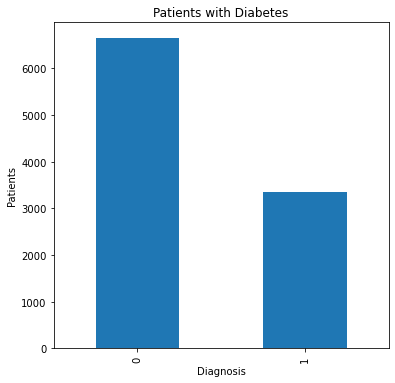

In [20]:
d_count = data['Diabetic'].value_counts()
fig = plt.figure(figsize=(6,6))
ax=fig.gca()
d_count.plot.bar(ax=ax)
ax.set_title("Patients with Diabetes")
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Patients')
plt.show()
run.log_image(name="label distribution", plot=fig)

In [21]:
preg = data.Pregnancies.unique()
run.log_list('preg_cat', preg)

In [23]:
med_col = ['PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI']
stats = data[med_col].describe().to_dict()
for col in stats:
    keys = list(stats[col].keys())
    values = list(stats[col].values())
    for i in range(len(keys)):
        run.log_row(col,stat=keys[i], value = values[i])

In [24]:
data.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name='outputs/sample.csv', path_or_stream='./sample.csv')

run.complete()

## Experiment Results

In [29]:
import json
details = run.get_details()
print(details)
print("NOTICE ME"+str(json.dumps(run.get_metrics(), indent=2)))
print("NOTICE ME 2"+str(json.dumps(run.get_file_names(), indent=2)))

{'runId': '0ce9bb56-f9a8-449c-b2ee-5faf1909bb2a', 'target': 'local', 'status': 'Completed', 'startTimeUtc': '2021-05-12T04:50:03.845039Z', 'endTimeUtc': '2021-05-12T04:56:27.806178Z', 'properties': {'ContentSnapshotId': 'a68078a8-85e1-49ba-be00-8b444daf046b'}, 'inputDatasets': [], 'outputDatasets': [], 'logFiles': {}, 'submittedBy': 'Jaekang Lee'}
NOTICE ME{
  "observations": 10000,
  "label distribution": "aml://artifactId/ExperimentRun/dcid.0ce9bb56-f9a8-449c-b2ee-5faf1909bb2a/label distribution_1620795178.png",
  "preg_cat": [
    0,
    8,
    7,
    9,
    1,
    3,
    5,
    2,
    6,
    11,
    4,
    13,
    10,
    12,
    14
  ],
  "PlasmaGlucose": {
    "stat": [
      "count",
      "mean",
      "std",
      "min",
      "25%",
      "50%",
      "75%",
      "max"
    ],
    "value": [
      10000.0,
      107.8502,
      31.920909360565563,
      44.0,
      84.0,
      105.0,
      129.0,
      192.0
    ]
  },
  "DiastolicBloodPressure": {
    "stat": [
      "count"

In [ ]:
()